In [11]:
from hwr.data.reader import IAMReader
from hwr.constants import SPLIT
import random
import pandas as pd
from hwr.data.datarep import *

In [12]:
# Read samples from test split
reader = IAMReader(SPLIT.TEST)
samples = reader.get_samples()
sample = random.choice(samples)

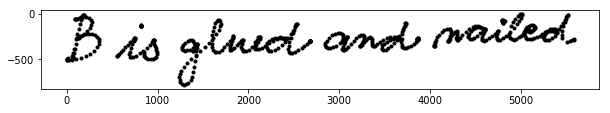

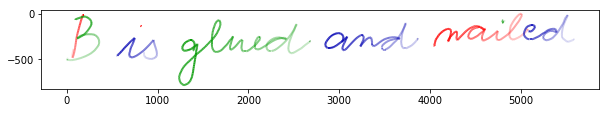

(<PointSet w=5587 h=788 points_len=666>, 'B is glued and nailed ')

In [13]:
# Plot random sample and the ground truth
pts = sample.pointset
pts.plot_both()
pts, sample.get_ground_truth_text()

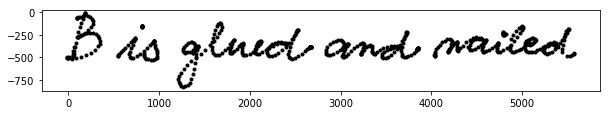

<PointSet w=5587 h=788 points_len=666>

In [14]:
pts.slope_correction()
pts.plot_points()
pts

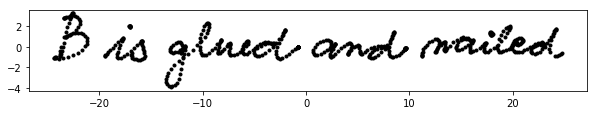

<PointSet w=5587 h=788 points_len=666>

In [15]:
# normalization based on y-axis. Unit variance and zero mean.
# y follow x variance to preserve aspect ratio.
pts.normalize_points()
pts.plot_points()
pts

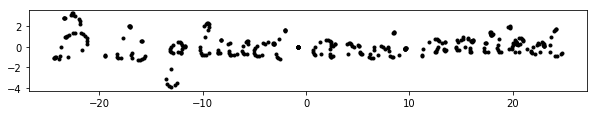

<PointSet w=5587 h=788 points_len=367>

In [16]:
# Downsampling based on angle. Cosine similarity of two adjacent line
# Use before resampling for line smoothing
pts.down_sample_angle(cos_th=0.975)
pts.plot_points()
pts

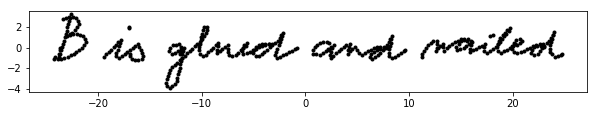

In [17]:
# Resampling along stroke with interval d
pts.resample_distance(d=0.33)
pts.plot_points()

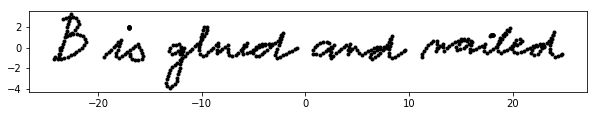

<PointSet w=5587 h=788 points_len=422>

In [18]:
# Up sample short stroke to at least the argument value.
# to increase signifiance of short stroke like ",", "." etc
pts.up_sample_short_stroke(n=10)
pts.plot_points()
pts

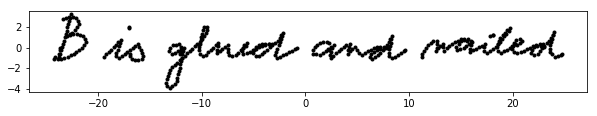

<PointSet w=5587 h=788 points_len=403>

In [19]:
# Downsampling based on distance. Remove next point if within d_th distance.
pts.down_sample_distance(d_th=0.2)
pts.plot_points()
pts

In [20]:
# Features based on each line connecting two points.
# Each line contains 6 features: (start_x, start_y, direction_x, direction_y, down, up)
features = pts.generate_features(fset=1)
print("Example features:\n {}".format(features[:2]))

Example features:
 [[-22.60281246  -3.20872046  -0.09249904   0.3167711    1.
    0.        ]
 [-22.6953115   -2.89194936  -0.09249904   0.3167711    1.
    0.        ]]
